# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


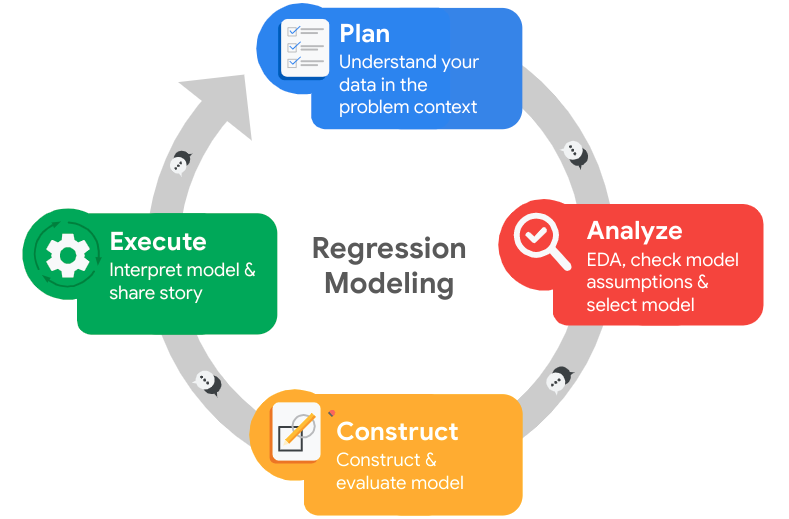

## **Pace: Plan**

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

**Plan stage**

1.Who are your stakeholders for this project?
- Human Resources (HR) department

2.What are you trying to solve or accomplish?
- Use a regression model or machine learning model to predict whether or not an employee will leave the company

3.What are your initial observations when you explore the data?
- No missing value
- 3,008 rows contain duplicates. That is 20% of the data.
- check Outliers: Certain types of models are more sensitive to outliers than others. When get to the stage of building model, consider whether to remove outliers, based on the type of model decide to use. Logistic Reg Model need No Extreme Outliers assumptions,Tree-based model robust to Outliers.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages

# For data manipulation
import pandas as pd
import numpy as np

# For data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# For data modeling
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from xgboost import XGBClassifier,XGBRegressor
from xgboost import plot_importance

# For metrics and helpful functions
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,RocCurveDisplay
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
import math

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For saving models
import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head(10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df0.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
df0 = df0.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})


# Display all column names after the update
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
df0.isna().sum()


satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
df0.duplicated().sum()


3008

In [9]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head(10)


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
1516,0.40,0.50,2,127,3,0,1,0,IT,low
1616,0.37,0.46,2,156,3,0,1,0,sales,low
1696,0.39,0.56,2,160,3,0,1,0,sales,low
1833,0.10,0.85,6,266,4,0,1,0,sales,low
12000,0.38,0.53,2,157,3,0,1,0,sales,low


The above output shows the first five occurences of rows that are duplicated farther down in the dataframe. How likely is it that these are legitimate entries? In other words, how plausible is it that two employees self-reported the exact same response for every column?

You could perform a likelihood analysis by essentially applying Bayes' theorem and multiplying the probabilities of finding each value in each column, but this does not seem necessary. With several continuous variables across 10 columns, it seems very unlikely that these observations are legitimate. You can proceed by dropping them.

In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1=df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
df1.head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

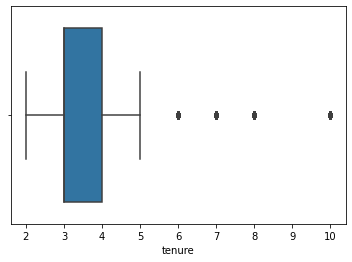

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
sns.boxplot(df1['tenure'])

In [12]:
# Determine the number of rows containing outliers
percentile25=df1['tenure'].quantile(0.25)
percentile75=df1['tenure'].quantile(0.75)
iqr=percentile75-percentile25
upper_limit=percentile75+1.5*iqr
lower_limit=percentile25-1.5*iqr
outlier_count = ((df1['tenure'] < lower_limit) | (df1['tenure'] > upper_limit)).sum()
outlier_count 

824

In [13]:
lower_limit,upper_limit

(1.5, 5.5)

Certain types of models are more sensitive to outliers than others. When get to the stage of building model, consider whether to remove outliers, based on the type of model decide to use.
- **Logistic Regression Model**: No Extreme Outliers

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [14]:
# Get numbers of people who left vs. stayed
print(df1['left'].value_counts())

# Get percentages of people who left vs. stayed
print(df1['left'].value_counts(normalize=True))


0    10000
1     1991
Name: left, dtype: int64
0    0.833959
1    0.166041
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

**Boxplot + Histogram**
- A **boxplot** showing **average_monthly_hours** distributions for **number_project**, comparing the distributions of employees who stayed versus those who **left**.
- Plus, plot a **histogram** to visualize the distribution of **number_project** for those who stayed and those who **left**.

**Scatterplot**
- **average_monthly_hours** vs the **satisfaction_level**.

**Boxplot + Histogram**
- **satisfaction_level** by **tenure**.

**Boxplot**
- **satisfaction_level** vs **left**.

**Histogram**
- **salary** by **tenure** (short vs long tenured people)

**Scatterplot** / **Lineplot**
- **average_monthly_hours** vs the **last_evaluation**.

**Histogram**
- distribution of **department** for those who stayed and those who **left**

**Heatmap**
- correlation

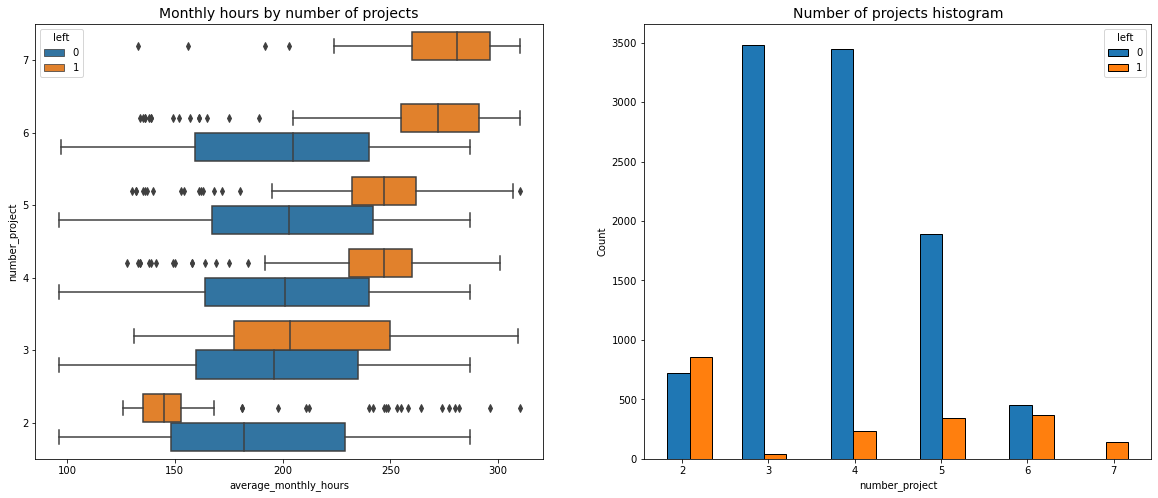

In [15]:
# Create a plot as needed
fig,axes=plt.subplots(1,2,figsize=(20,8))
sns.boxplot(x=df1['average_monthly_hours'],
            y=df1['number_project'],
            hue=df1['left'],
            orient="h",
            ax=axes[0])
axes[0].invert_yaxis()
axes[0].set_title('Monthly hours by number of projects', fontsize='14')

sns.histplot(df1, x='number_project', hue='left',
             multiple='dodge',
             shrink=3,
             alpha=1,
             ax=axes[1])
axes[1].set_title('Number of projects histogram', fontsize='14')
plt.show()

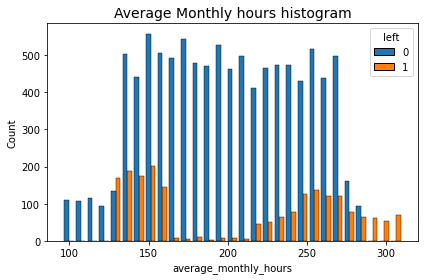

In [16]:
sns.histplot(df1, x='average_monthly_hours', hue='left',
             multiple='dodge',
             shrink=0.8,
             alpha=1,
             element="bars")
plt.title('Average Monthly hours histogram', fontsize='14')
plt.tight_layout()

It might be natural that **people who work on more projects would also work longer hours**. This appears to be the case here, with the mean hours of each group (stayed and left) increasing with number of projects worked. However, a few things stand out from this plot.

1.There are **two groups** of employees who **left** the company:
- (A) Those who **worked considerably less than their peers with the same number of projects**.
   - It's possible that they were fired.
   - This group includes employees who had already given their notice and were assigned fewer hours because they were already on their way out the door.
   
- (B) Those who **worked much more**. 
    - It's reasonable to infer that they probably quit. The folks in group B likely contributed a lot to the projects they worked in; they might have been the largest contributors to their projects. 

2.**Everyone with seven projects left the company**. The interquartile ranges of this group and those who left with six projects was ~255-295 hours/month, much more than any other group. 

3.The **optimal number of projects** for employees to work on seems to be **3-4**. The **ratio of left/stayed is very small** for these cohorts.

4.If you assume a work week of 40 hours and two weeks of vacation per year, then the average number of working hours per month of employees working Monday-Friday `= 50 weeks * 40 hours per week / 12 months = 166.67 hours per month`. This means that, aside from the employees who worked on two projects, every group-even those who didn't leave the company-worked considerably more hours than this. It seems that **employees here are overworked(3-7 projects)**.

As the next step, confirm that all employees with seven projects left.

In [17]:
df1[df1['number_project']==7]['left'].value_counts()

1    145
Name: left, dtype: int64

This confirms that all employees with 7 projects did leave.

Next, examine the average monthly hours versus the satisfaction levels

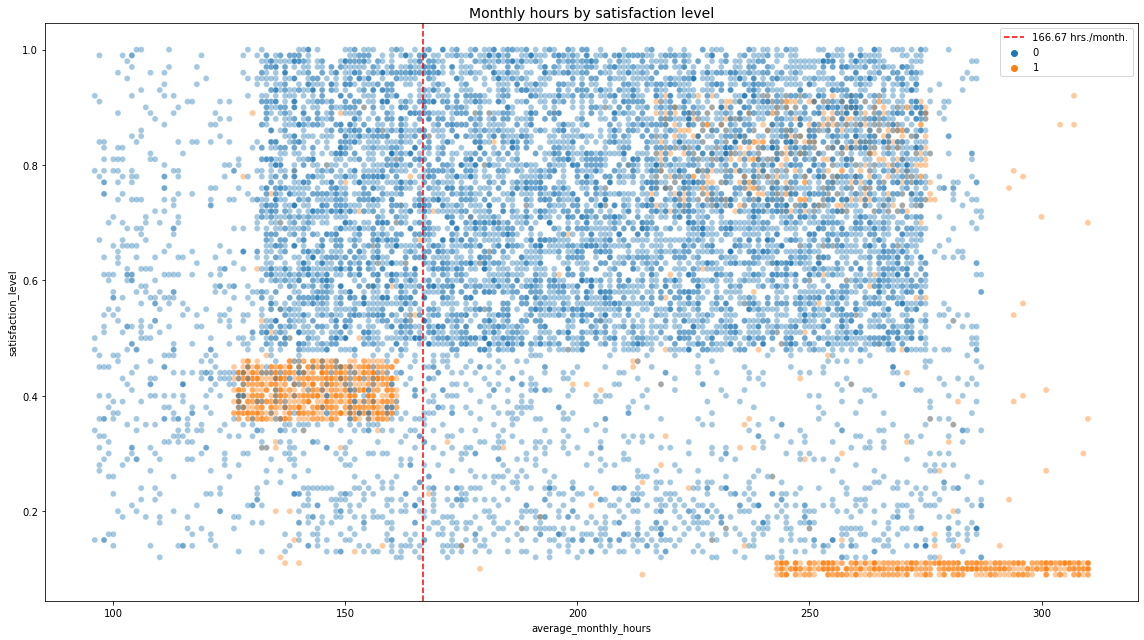

In [18]:
# Create a plot as needed
plt.figure(figsize=(16, 9))
sns.scatterplot(x=df1["average_monthly_hours"], y=df1["satisfaction_level"],
                hue=df1["left"], alpha=.4)
plt.axvline(x=166.67, color='r', label='166.67 hrs./month.', ls='--')
plt.title('Monthly hours by satisfaction level', fontsize='14');
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.0, 1.0))

The **scatterplot** above shows that there are **three groups** of employees who **left** the company:
- There was a sizeable group of employees who worked **~240-315 hours per month**. 315 hours per month is over `315*12mth/50weeks=75 hours per week` for a whole year. It's likely this is related to their **satisfaction levels being close to zero**. 
- The plot also shows another group of people who left, those who had more **normal working hours**. Even so, **their satisfaction was only around 0.4**. It's difficult to speculate about why they might have left. It's possible they felt pressured to work more, considering so many of their peers worked more. And that pressure could have lowered their satisfaction levels. 
- Finally, there is a group who worked **~210-280 hours per month**, and they had **satisfaction levels ranging ~0.7-0.9**. 

Note the strange shape of the distributions here. This is indicative of data manipulation or synthetic data. 

For the next visualization, it might be interesting to visualize satisfaction levels by tenure.

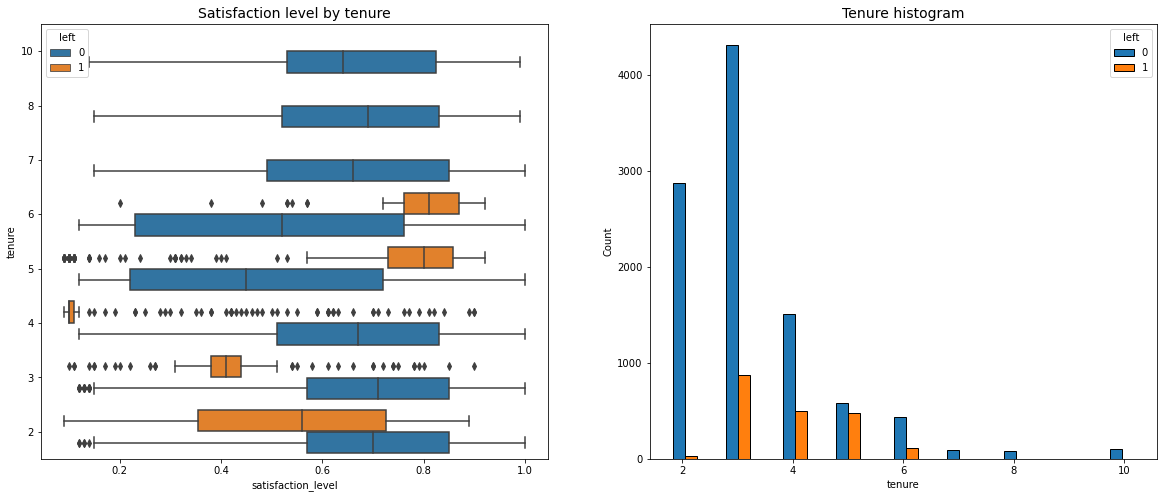

In [19]:
# Create a plot as needed
fig,axes=plt.subplots(1,2,figsize=(20,8))
sns.boxplot(x=df1['satisfaction_level'],
            y=df1['tenure'],
            hue=df1['left'],
            orient="h",
            ax=axes[0])
axes[0].invert_yaxis()
axes[0].set_title('Satisfaction level by tenure', fontsize='14')

sns.histplot(df1, x='tenure', hue='left',
             multiple='dodge',
             shrink=5,
             alpha=1,
             ax=axes[1])
axes[1].set_title('Tenure histogram', fontsize='14')
plt.show()


1.Employees who **left** fall into **two general categories**: 
- Dissatisfied employees with shorter tenures.
- Very satisfied employees with medium-length tenures.

2.**Four-year employees who left** seem to have an **unusually low satisfaction level**. It's worth investigating changes to company policy that might have affected people specifically at the four-year mark, if possible. 

3.The **longest-tenured employees didn't leave**. Their satisfaction levels aligned with those of newer employees who stayed.

4.The histogram shows that there are relatively **few longer-tenured employees**. It's possible that they're the higher-ranking, higher-paid employees.

As the next step in analyzing the data, calculate the mean and median satisfaction scores of employees who left and those who didn't.

In [20]:
df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


In [21]:
df1.groupby(['left'])['satisfaction_level'].agg(['mean','median'])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


Text(0.5, 1.0, 'Satisfaction level Boxplot')

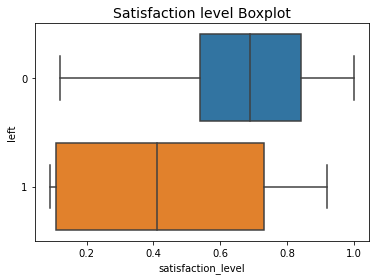

In [22]:
# Create a plot as needed
sns.boxplot(x=df1['satisfaction_level'],y=df1['left'], orient="h")
plt.title('Satisfaction level Boxplot', fontsize='14')


As expected, the **mean and median satisfaction scores of employees who left** are **lower than** those of employees who **stayed**. Interestingly, among employees who stayed, the mean satisfaction score appears to be slightly below the median score. This indicates that satisfaction levels among those who stayed might be skewed to the left.

Next, examine salary levels for different tenures.

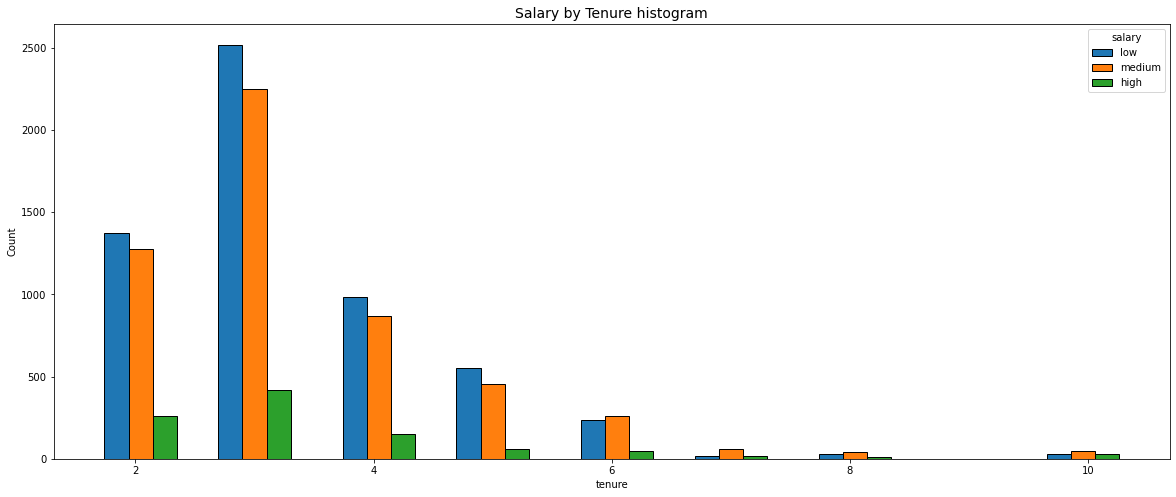

In [23]:
# Create a plot as needed
plt.figure(figsize=(20,8))
sns.histplot(df1, x='tenure', hue='salary',
             multiple='dodge',
             shrink=7,
             alpha=1)
plt.title('Salary by Tenure histogram', fontsize='14')
plt.show()



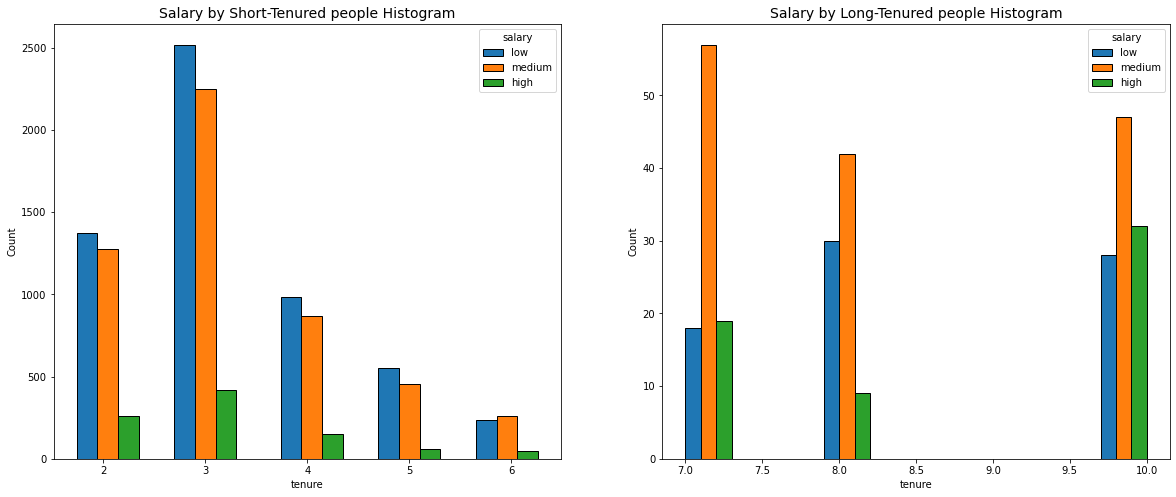

In [24]:
fig,axes=plt.subplots(1,2,figsize=(20,8))
sns.histplot(df1[df1['tenure']<7], x='tenure', hue='salary',
             multiple='dodge',
             shrink=7,
             alpha=1,
             ax=axes[0])
axes[0].set_title('Salary by Short-Tenured people Histogram', fontsize='14')

sns.histplot(df1[df1['tenure']>= 7], x='tenure', hue='salary',hue_order=['low', 'medium', 'high'],
             multiple='dodge',
             shrink=1,
             alpha=1,
             ax=axes[1])
axes[1].set_title('Salary by Long-Tenured people Histogram', fontsize='14')
plt.show()


The plots above show that **long-tenured employees were not disproportionately comprised of higher-paid employees**.

Next, explore whether there's a correlation between working long hours and receiving high evaluation scores by create a scatterplot of average_monthly_hours versus last_evaluation.

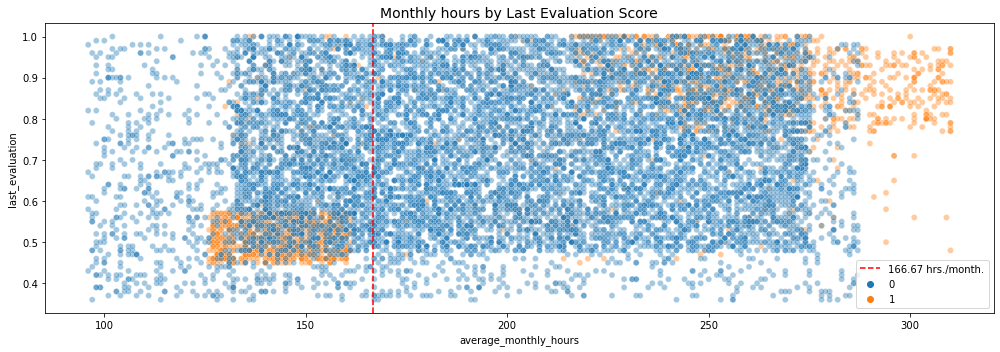

In [25]:
# Create a plot as needed
plt.figure(figsize=(14, 5))
sns.scatterplot(x=df1["average_monthly_hours"], y=df1["last_evaluation"],
                hue=df1["left"], alpha=.4)
plt.title('Monthly hours by Last Evaluation Score', fontsize='14')
plt.axvline(x=166.67, color='r', label='166.67 hrs./month.', ls='--')
plt.tight_layout()
plt.legend()


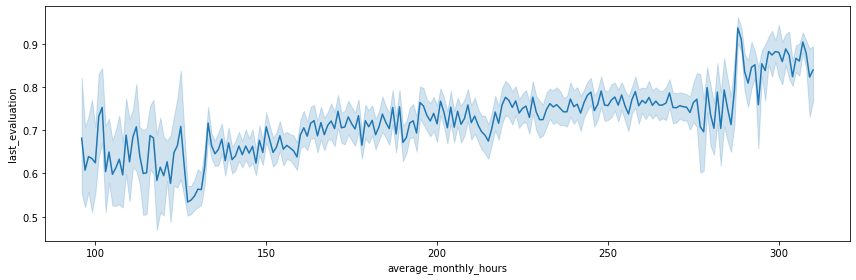

In [26]:
plt.figure(figsize=(12, 4))
sns.lineplot(data=df1, x='average_monthly_hours', y='last_evaluation')
plt.tight_layout()

- The **scatterplot** indicates **two groups of employees who left**: 
   - overworked employees who performed very well 
   - employees who worked slightly under the nominal monthly average of 166.67 hours with lower evaluation scores.

- The **lineplot** seems to be a **correlation** between hours worked and evaluation score  
- There isn't a high percentage of employees in the upper left quadrant of this plot; but working long hours doesn't guarantee a good evaluation score.
- Most of the employees in this company work well over 167 hours per month.

Next, examine whether employees who worked very long hours were promoted in the last five years.

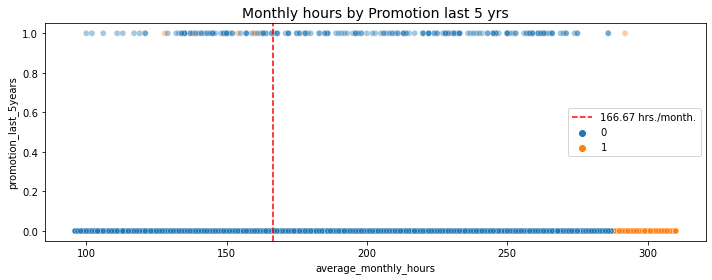

In [27]:
# Create a plot as needed
plt.figure(figsize=(10, 4))
sns.scatterplot(x=df1["average_monthly_hours"], y=df1["promotion_last_5years"],
                hue=df1["left"], alpha=.4)
plt.axvline(x=166.67, color='r', label='166.67 hrs./month.', ls='--')
plt.title('Monthly hours by Promotion last 5 yrs', fontsize='14');
plt.tight_layout()
plt.legend()

The scatterplot above shows:
- very **few employees** who were **promoted in the last five years left**
- very **few employees** who **worked the most hours** were **promoted**
- **all** of the employees who **left** were working the **longest hours**  

Next, inspect how the employees who left are distributed across departments.

In [28]:
df1.groupby(['department','left']).size().sort_values(ascending = False).unstack(level = 'left')

left,0,1
department,,
IT,818,158
RandD,609,85
accounting,512,109
hr,488,113
management,384,52
marketing,561,112
product_mng,576,110
sales,2689,550
support,1509,312


Text(0.5, 1.0, 'Counts of stayed/left by department Histogram')

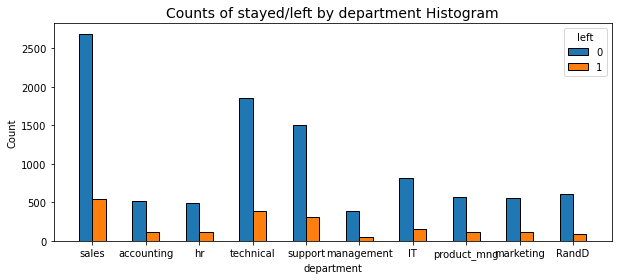

In [29]:
plt.figure(figsize=(10,4))
sns.histplot(df1, x='department', hue='left',
             multiple='dodge',
             shrink=0.5,
             alpha=1)
plt.title('Counts of stayed/left by department Histogram', fontsize='14')


There doesn't seem to be any department that differs significantly in its proportion of employees who left to those who stayed.

Lastly, check for strong correlations between variables in the data.

Text(0.5, 1.0, 'Correlation Heatmap')

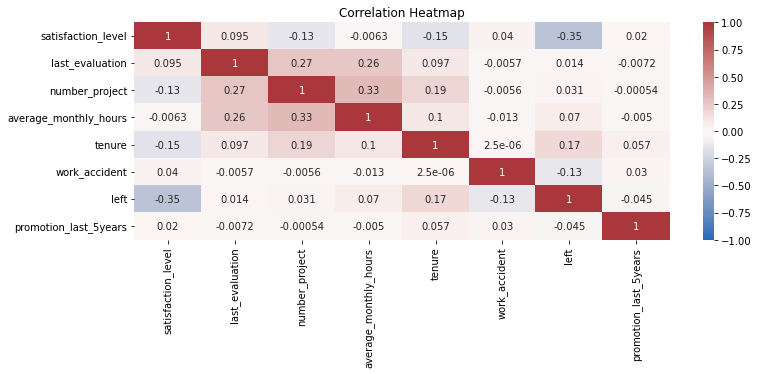

In [30]:
# Create a plot as needed
plt.figure(figsize=(12, 4))
sns.heatmap(df1.corr(),annot=True,cmap="vlag",vmin=-1, vmax=1)
plt.title('Correlation Heatmap')

In [31]:
df1.corr().unstack().sort_values(ascending = False)[8:]

number_project         average_monthly_hours    0.331516
average_monthly_hours  number_project           0.331516
last_evaluation        number_project           0.270256
number_project         last_evaluation          0.270256
average_monthly_hours  last_evaluation          0.264678
last_evaluation        average_monthly_hours    0.264678
tenure                 number_project           0.188837
number_project         tenure                   0.188837
left                   tenure                   0.173295
tenure                 left                     0.173295
                       average_monthly_hours    0.102875
average_monthly_hours  tenure                   0.102875
last_evaluation        tenure                   0.096829
tenure                 last_evaluation          0.096829
satisfaction_level     last_evaluation          0.095186
last_evaluation        satisfaction_level       0.095186
average_monthly_hours  left                     0.070409
left                   average_

The **correlation heatmap** confirms that:
- the **number of projects, monthly hours, and evaluation scores** all have some **positive correlation with each other**
   - number_project-average_monthly_hours: 0.33
   - number_project-last_evaluation: 0.27
   - average_monthly_hours-last_evaluation: 0.26
- whether an employee **leaves** is **negatively correlated** with **their satisfaction level** 
   - left-satisfaction_level: -0.35

### Insights

- It appears that **employees are leaving the company** as a result of **poor management**. 
- **Leaving** is tied to 
   - **longer working hours**
   - **many projects**, and 
   - generally **lower satisfaction levels**. 
   - It can be ungratifying to **work long hours and not receive promotions or good evaluation scores**. There's a sizeable group of employees at this company who are probably burned out. 
- It also appears that if an employee has **spent more than six years at the company**, they **tend not to leave**.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

**Goal**: To predict whether an employee leaves the company, which is a categorical outcome variable. So this task involves classification. More specifically, this involves **binary classification**, since the outcome variable left can be either 1 (indicating employee left) or 0 (indicating employee didn't leave).

### Identify the types of models most appropriate for this task.

Since the variable want to predict (whether an employee leaves the company) is **categorical**, you could either 
- build a **Logistic Regression model**, 
- or a **Tree-based Machine Learning model**.

### Modeling Approach A: Logistic Regression Model

This approach covers implementation of Logistic Regression.

**Logistic regression**
- Note that binomial logistic regression suits the task because it involves **binary classification**.
- Before splitting the data, **encode the non-numeric** variables: 
   - department (sales,accounting,hr...): Categorical, **dummy** it for modeling
   - salary (low,medium,high): Categorical & ordinal, **convert the levels to numbers, 0–2**.

In [32]:
df_enc = df1.copy()
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])    
    .cat.codes
)

df_enc= pd.get_dummies(df_enc, drop_first = False)
df_enc.head()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


### Assumption: No severe multicollinearity among X variables.

Create a **heatmap** to visualize **how correlated variables** are. Consider which variables are interested in examining correlations between.

Text(0.5, 1.0, 'Correlation Heatmap')

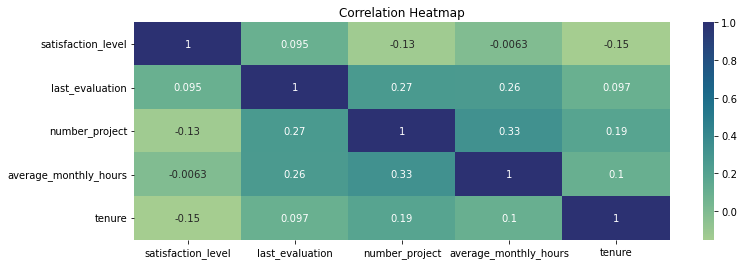

In [33]:
plt.figure(figsize=(12, 4))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']]
            .corr(),annot=True,cmap="crest")
plt.title('Correlation Heatmap')

Create a **stacked bar plot** to visualize **number of employees across department**, comparing those who left with those who didn't.

Text(0.5, 1.0, 'Counts of stayed/left by department Histogram')

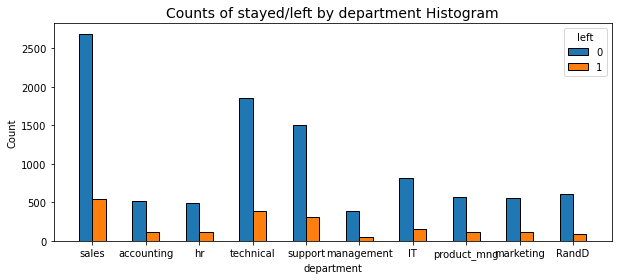

In [34]:
plt.figure(figsize=(10,4))
sns.histplot(df1, x='department', hue='left',
             multiple='dodge',
             shrink=0.5,
             alpha=1)
plt.title('Counts of stayed/left by department Histogram', fontsize='14')

### Assumption: No Extreme Outliers

Since logistic regression is **quite sensitive to outliers**, it would be a good idea at this stage to **remove the outliers in the tenure** column that were identified earlier.

In [35]:
print('Tenure Lower Limit: ',lower_limit)
print('Tenure Upper Limit: ',upper_limit)
print('Tenure Outlier Count: ',outlier_count)

Tenure Lower Limit:  1.5
Tenure Upper Limit:  5.5
Tenure Outlier Count:  824


In [36]:
df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]
df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


### Model Training
1.Split the data into training set (75%) and testing set (25%), with stratify based on the values in y, if the classes are unbalanced.

2.Construct a logistic regression model and fit it to the training dataset.

3.Test the logistic regression model: use the model to make predictions on the test set.

In [37]:
y = df_logreg['left']
X = df_logreg.drop('left', axis=1)

In [38]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [39]:
y.head()

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

### Check for Imbalanced Class
Split the data into training set (75%) and testing set (25%), with **stratify based on the values in y**, if the **classes are unbalanced**.

In [40]:
y.value_counts(normalize=True)

0    0.831468
1    0.168532
Name: left, dtype: float64

- There is an **approximately 83%-17% split**. 
- So the data is **not perfectly balanced**, but it is **not too imbalanced**. 
  - If it was more severely imbalanced, you might want to **resample** the data to make it more balanced. 
- In this case, use this data without modifying the class balance and continue evaluating the model.

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [42]:
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)
y_pred = log_clf.predict(X_test)

### Confusion matrix and Classification report
- **Confusion matrix**: True Negative, False Positive, False Negative, True Positive 
- **Classification report**: Accuracy, Precision, Recall, F1 score

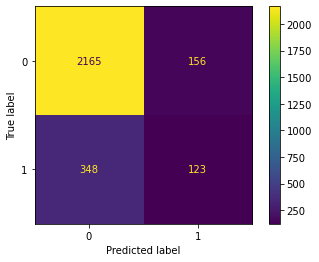

In [43]:
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_)
log_disp.plot(values_format='')


The upper-left quadrant displays the number of **True Negative** (2165).
- The number of people who did not leave that the model accurately predicted did not leave.

The upper-right quadrant displays the number of **False Positive** (156).
- The number of people who did not leave the model inaccurately predicted as leaving.

The bottom-left quadrant displays the number of **False Negative** (348).
- The number of people who left that the model inaccurately predicted did not leave.

The bottom-right quadrant displays the number of **True Positive** (123).
- The number of people who left the model accurately predicted as leaving.

A perfect model would yield all True Negatives and True Positives, and no False Negatives or False Positives.

In [44]:
target_labels = ["stay", "left"]
print(classification_report(y_test, y_pred, target_names=target_labels))
print('Accuracy Score: ','%.3f' % accuracy_score(y_test, y_pred))
print('Precision Score: ','%.3f' % precision_score(y_test, y_pred))
print('Recall Score: ','%.3f' % recall_score(y_test, y_pred))
print('F1 Score: ','%.3f' % f1_score(y_test, y_pred))

              precision    recall  f1-score   support

        stay       0.86      0.93      0.90      2321
        left       0.44      0.26      0.33       471

    accuracy                           0.82      2792
   macro avg       0.65      0.60      0.61      2792
weighted avg       0.79      0.82      0.80      2792

Accuracy Score:  0.819
Precision Score:  0.441
Recall Score:  0.261
F1 Score:  0.328


The **classification report** (all weighted averages) above shows that the **logistic regression model** achieved a 
- precision of 79% 
- recall of 82%
- f1-score of 80% 
- accuracy of 82%. 

However, if it's most important to **predict employees who leave**, then the **scores are significantly lower**.

### Modeling Approach B: Tree-based Machine Learning Model
This approach covers implementation of Decision Tree and Random Forest.

### No Assumption need :Robust to Outliers

In [45]:
y = df_enc['left']
X = df_enc.drop('left', axis=1)

In [46]:
y.value_counts(normalize=True)

0    0.833959
1    0.166041
Name: left, dtype: float64

### Model Training
1.Split the data into training set (75%) and testing set (25%), with stratify based on the values in y, if the classes are unbalanced.

2.Construct a **Decision Tree / Random forest model** and **CV GridSearch** and fit it to the training dataset.

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

### Decision tree (Round 1)
Construct a decision tree model and set up cross-validated grid-search to exhuastively search for the best model parameters.

In [48]:
tree = DecisionTreeClassifier(random_state=0)
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [1, 2, 5],
             'min_samples_split': [2, 4, 6]
             }
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=5, refit='roc_auc')


In [49]:
%%time
tree1.fit(X_train, y_train)

CPU times: user 3.89 s, sys: 0 ns, total: 3.89 s
Wall time: 3.89 s


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [1, 2, 5],
                

In [50]:
print(tree1.best_params_)
print(tree1.best_score_)

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.9735966427988896


This is a **strong AUC score**, which shows that this model can predict employees who will leave very well.

In [51]:
results = pd.DataFrame(columns=['Model', 'F1', 'Recall', 'Precision', 'Accuracy','AUC'])
def make_results(model_name, model_object):
    cv_results = pd.DataFrame(model_object.cv_results_)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_roc_auc'].idxmax(), :]
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    auc = best_estimator_results.mean_test_roc_auc
    table = pd.DataFrame({'Model': [model_name],
                          'F1': [f1],
                          'Recall': [recall],
                          'Precision': [precision],
                          'Accuracy': [accuracy],
                          'AUC': [auc]})
    return table

result_table = make_results("Decision Tree CV", tree1)
result_table

,Model,F1,Recall,Precision,Accuracy,AUC
0,Decision Tree CV,0.940851,0.916931,0.966147,0.980874,0.973597


All of these scores from the **decision tree model** are **strong** indicators of **good model performance**.

Recall that:
- **decision trees can be vulnerable to overfitting**, and
- **random forests avoid overfitting** by incorporating multiple trees to make predictions.

Construct a random forest model next.

### Random Forest (Round 1)
Construct a random forest model and set up cross-validated grid-search to exhuastively search for the best model parameters.

In [52]:
rf = RandomForestClassifier(random_state=0)
rf_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,4],
             'min_samples_split': [1,4],
             'n_estimators': [500],
             }  
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}
rf1 = GridSearchCV(rf, rf_params, scoring=scoring, cv=5, refit='roc_auc')


In [53]:
%%time
rf1.fit(X_train, y_train)

CPU times: user 1min 52s, sys: 0 ns, total: 1min 52s
Wall time: 1min 53s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [54]:
pickle.dump(rf1, open('rf1.sav', 'wb'))

In [55]:
#best AUC score achieved by the random forest model on the training set
rf1.best_score_

0.9801551861911069

In [56]:
#the optimal values for the parameters of the random forest model
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'n_estimators': 500}

In [57]:
tree1_cv_results=make_results("Decision Tree CV", tree1)
rf1_cv_results = make_results('Random Rorest CV', rf1)

In [58]:
results_table=pd.concat([tree1_cv_results,rf1_cv_results])
results_table

,Model,F1,Recall,Precision,Accuracy,AUC
0,Decision Tree CV,0.940851,0.916931,0.966147,0.980874,0.973597
0,Random Rorest CV,0.926349,0.906220,0.947519,0.976092,0.980155


The evaluation scores of the **Decision Tree model are better** than those of the random forest model, with the exception of auc (the auc score of the decision tree model is approximately 0.007 lower, which is a negligible amount). This indicates that the Decision Tree model mostly outperforms the random forest model.

### Choose Champion Model and Predict on Test Set

In [64]:
def get_scores(model_name, model, X_test, y_test):
    preds = model.best_estimator_.predict(X_test)

    auc = roc_auc_score(y_test, preds)
    accuracy = accuracy_score(y_test, preds)
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)

    table = pd.DataFrame({'Model': [model_name],
                          'F1': [f1],
                          'Recall': [recall],
                          'Precision': [precision],
                          'Accuracy': [accuracy],
                          'AUC': [auc]})
    return table

In [67]:
tree1_test_scores = get_scores('Decision Tree test', tree1, X_test, y_test)
tree1_test_scores

,Model,F1,Recall,Precision,Accuracy,AUC
0,Decision Tree test,0.950719,0.929719,0.972689,0.983989,0.962259


In [68]:
pd.concat([tree1_cv_results,tree1_test_scores])

,Model,F1,Recall,Precision,Accuracy,AUC
0,Decision Tree CV,0.940851,0.916931,0.966147,0.980874,0.973597
0,Decision Tree test,0.950719,0.929719,0.972689,0.983989,0.962259


The test scores are very similar to the validation scores, which is good. This appears to be a strong model. Since this test set was only used for this model, it can be more confident that the model's performance on this data is representative of how it will perform on new, unseeen data.

### Feature Engineering

You might be skeptical of the high evaluation scores. There is a chance that there is some data leakage occurring. Data leakage is when you use data to train your model that should not be used during training, either because it appears in the test data or because it's not data that you'd expect to have when the model is actually deployed. Training a model with leaked data can give an unrealistic score that is not replicated in production.

In this case, it's likely that the company won't have satisfaction levels reported for all of its employees. It's also possible that the average_monthly_hours column is a source of some data leakage. If employees have already decided upon quitting, or have already been identified by management as people to be fired, they may be working fewer hours.

The first round of decision tree and random forest models included all variables as features. This next round will incorporate feature engineering to build improved models.

You could proceed by:
- **dropping satisfaction_level** and 
- creating a **new feature ['overworked']** that roughly captures whether an employee is overworked. It will be a binary variable.

In [69]:
df2 = df_enc.drop('satisfaction_level', axis=1)
df2.head()

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [84]:
df2['overworked'] = df2['average_monthly_hours']
print('Max hours:', df2['overworked'].max())
print('Min hours:', df2['overworked'].min())

Max hours: 310
Min hours: 96


- **166.67** is approximately the **average number of monthly hours** for someone who works 50 weeks per year, 5 days per week, 8 hours per day.

- Define being **overworked** as working **more than 175 hours** per month on average.

- To make the overworked column **binary**, reassign the column using a boolean mask.

In [85]:
df2['overworked'] = (df2['overworked'] > 175 ).astype(int)
df2.head(10)

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
2,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
3,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
5,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
6,0.77,6,247,4,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
7,0.85,5,259,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
8,1.00,5,224,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
9,0.53,2,142,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [86]:
df2 = df2.drop('average_monthly_hours', axis=1)
df2.head()

,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.86,5,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
2,0.88,7,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
3,0.87,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.52,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


### Model Training 2

In [88]:
y = df2['left']
X = df2.drop('left', axis=1)

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

### Decision tree (Round 1)
Construct a decision tree model and set up cross-validated grid-search to exhuastively search for the best model parameters.

In [90]:
tree2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=5, refit='roc_auc')

In [91]:
%%time
tree2.fit(X_train, y_train)

CPU times: user 2.88 s, sys: 0 ns, total: 2.88 s
Wall time: 2.88 s


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [1, 2, 5],
                

In [92]:
tree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 4}

In [93]:
tree2.best_score_

0.9592371222494072

This model performs very well, even without satisfaction levels and detailed hours worked data.

In [94]:
tree2_cv_results=make_results("Decision Tree CV2", tree2)
tree_result=pd.concat([tree1_cv_results,tree2_cv_results])

In [95]:
tree_result

,Model,F1,Recall,Precision,Accuracy,AUC
0,Decision Tree CV,0.940851,0.916931,0.966147,0.980874,0.973597
0,Decision Tree CV2,0.858368,0.892182,0.828434,0.950852,0.959237


All scores fell. That's to be expected given fewer features were taken into account in this round of the model. Still, the scores are very good.

### Random Forest (Round 2)
Construct a random forest model and set up cross-validated grid-search to exhuastively search for the best model parameters.

In [96]:
rf2 = GridSearchCV(rf, rf_params, scoring=scoring, cv=5, refit='roc_auc')

In [97]:
%%time
rf2.fit(X_train, y_train)

CPU times: user 1min 20s, sys: 0 ns, total: 1min 20s
Wall time: 1min 20s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [99]:
rf2.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 500}

In [100]:
rf2.best_score_

0.965818631081981

In [98]:
rf2_cv_results = make_results('Random Rorest CV2', rf2)

In [103]:
rf_result=pd.concat([rf1_cv_results,rf2_cv_results])
rf_result

,Model,F1,Recall,Precision,Accuracy,AUC
0,Random Rorest CV,0.926349,0.90622,0.947519,0.976092,0.980155
0,Random Rorest CV2,0.880214,0.90690,0.855666,0.958968,0.965819


Again, the scores dropped slightly, but the **random forest performs better** than the decision tree if **using AUC** as the deciding metric.

### Choose Champion Model and Predict on Test Set

In [104]:
rf_test_scores = get_scores('Random Forest test', rf2, X_test, y_test)
rf_test_scores

,Model,F1,Recall,Precision,Accuracy,AUC
0,Random Forest test,0.891496,0.915663,0.868571,0.962975,0.944031


This seems to be a stable, well-performing final model.

### Confusion matrix
Plot a confusion matrix to visualize how well it predicts on the test set.

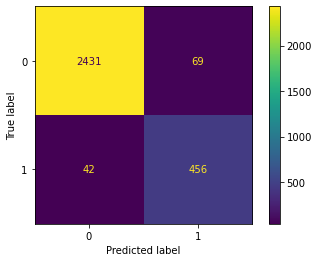

In [105]:
preds = rf2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf2.classes_)
disp.plot(values_format='')

The model predicts **more false positives** than false negatives, which means that some employees may be identified as at risk of quitting or getting fired, when that's actually not the case. But this is still a strong model.

### Decision tree feature importance
Inspect the splits of the decision tree model and the most important features in the decision tree model.

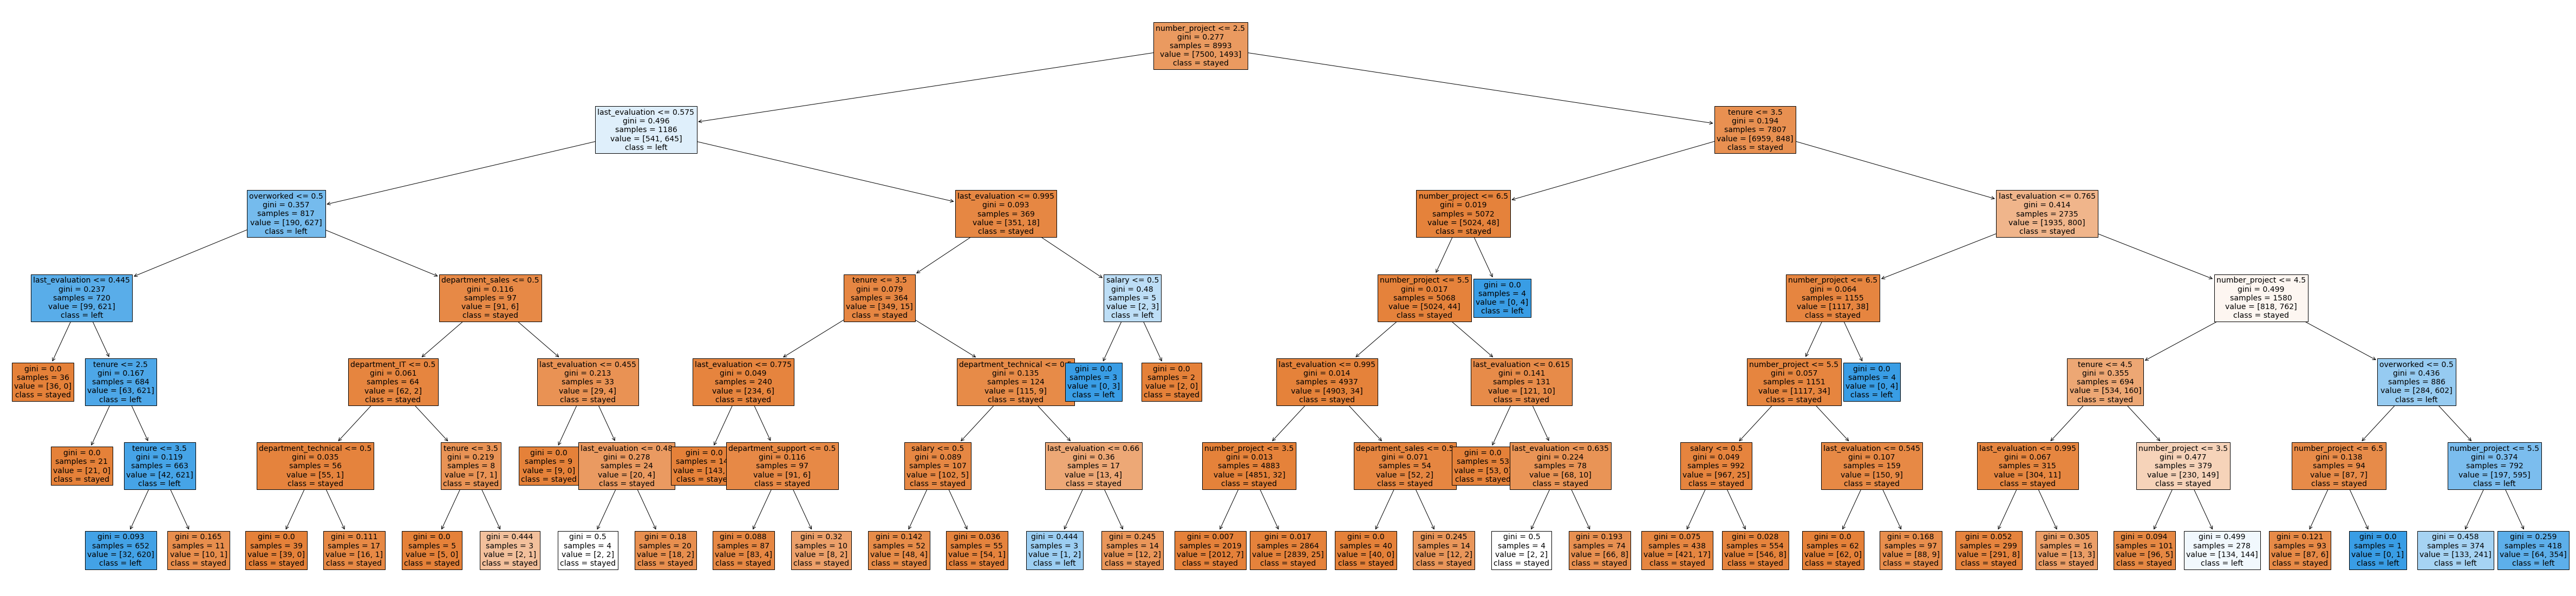

In [106]:
plt.figure(figsize=(85,20))
plot_tree(tree2.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True)
plt.show()

In [112]:
importances = tree2.best_estimator_.feature_importances_
tree2_importances = pd.DataFrame(importances, columns=['gini_importance'],index=X.columns) \
                    .sort_values(by='gini_importance',ascending=False)
tree2_importances

,gini_importance
number_project,0.343930
last_evaluation,0.335089
tenure,0.213517
overworked,0.104462
salary,0.001610
department_technical,0.000630
department_sales,0.000434
department_support,0.000238
department_IT,0.000090
promotion_last_5years,0.000000


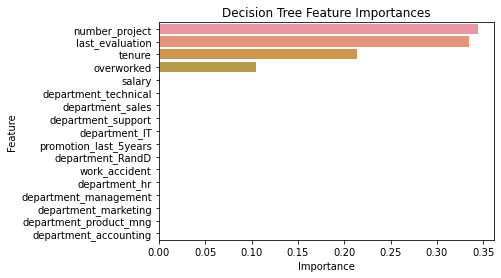

In [117]:
sns.barplot(data=tree2_importances,
            x='gini_importance',
            y=tree2_importances.index)
plt.title("Decision Tree Feature Importances")
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

The barplot above shows that in this **decision tree model**:
- number_project
- last_evaluation
- tenure
- overworked 

have the **highest importance**, in that order. These variables are most helpful in predicting the outcome variable, left.

### Random Forest feature importance
Inspect the most important features in the random forest model.

In [118]:
importances = rf2.best_estimator_.feature_importances_
rf2_importances = pd.DataFrame(importances, columns=['gini_importance'],index=X.columns) \
                    .sort_values(by='gini_importance',ascending=False)
rf2_importances

,gini_importance
last_evaluation,0.352047
number_project,0.349273
tenure,0.193098
overworked,0.102079
salary,0.000618
department_IT,0.000608
department_technical,0.000544
department_sales,0.000520
department_support,0.000427
department_management,0.000204


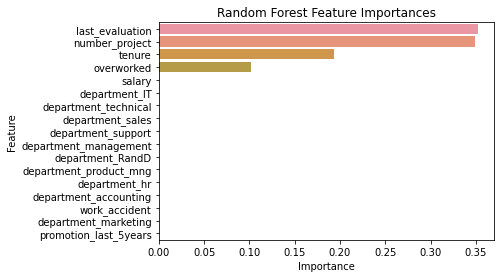

In [119]:
sns.barplot(data=rf2_importances,
            x='gini_importance',
            y=rf2_importances.index)
plt.title("Random Forest Feature Importances")
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

The plot above shows that in this **random forest model**:
- last_evaluation 
- number_project
- tenure
- overworked 

have the **highest importance**, in that order. These variables are most helpful in predicting the outcome variable, left, and they are the **same** as the ones used by the decision tree model, excluding the order.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




In [120]:
rf_test_scores

,Model,F1,Recall,Precision,Accuracy,AUC
0,Random Forest test,0.891496,0.915663,0.868571,0.962975,0.944031


### Summary of model results

**Logistic Regression**

The logistic regression model achieved precision of 80%, recall of 83%, f1-score of 80% (all weighted averages), and accuracy of 83%, on the test set.


**Tree-based Machine Learning**

After conducting feature engineering, the random forest model achieved AUC of 94.4%, precision of 86.9%, recall of 92%, f1-score of 89.1%, and accuracy of 96.3% on the test set. The random forest modestly outperformed the decision tree model. 

### Conclusion, Recommendations, Next Steps

The models and the feature importances extracted from the models confirm that employees at the company are **overworked**.

To retain employees, the following **recommendations** could be presented to the stakeholders:
- Cap the **number of projects** that employees can work on.
- Consider promoting employees who have been with the company for at least four years, or conduct further investigation about why **four-year tenured** employees are so dissatisfied.
- Either reward employees for **working longer hours**, or don't require them to do so.
- If employees aren't familiar with the company's **overtime pay** policies, inform them about this. If the expectations around workload and time off aren't explicit, make them clear.
- Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts.
- High **evaluation scores** should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/put in more effort.


**Next Steps**

- It may be justified to still have some concern about **data leakage**. It could be prudent to consider how predictions change when **last_evaluation is removed** from the data. It's possible that evaluations aren't performed very frequently, in which case it would be useful to be able to predict employee retention without this feature. It's also possible that the evaluation score determines whether an employee leaves or stays, in which case it could be useful to pivot and try to predict performance score. The same could be said for satisfaction score.
- For another project, you could try building a **K-means model** on this data and analyzing the clusters. This may yield valuable insight.